In [1]:
!unzip "/content/drive/MyDrive/complaints.zip" -d "/content/drive/MyDrive/"

Archive:  /content/drive/MyDrive/complaints.zip
  inflating: /content/drive/MyDrive/complaints.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("/content/drive/MyDrive/complaints.csv")

<ipython-input-4-2df151a92331>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/complaints.csv")


In [5]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-07-15,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85020,NaN,NaN,Web,2024-07-15,In progress,Yes,NaN,9513145
1,2024-07-15,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,IL,61101,NaN,NaN,Web,2024-07-15,In progress,Yes,NaN,9513323


In [6]:
df.isnull().sum()

,0
Date received,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,742930
Consumer complaint narrative,3764757
Company public response,2968263
Company,0
State,46839
ZIP code,30226


In [9]:
df['Product'].value_counts()

,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",2163873
Credit reporting or other personal consumer reports,1480615
Debt collection,599721
Mortgage,402261
Checking or savings account,223853
Credit card or prepaid card,206373
Credit card,149767
Credit reporting,140429
Student loan,90980


In [29]:
df[df['Product'] == "Other financial service"]['Sub-product'].value_counts()

,count
Sub-product,
Debt settlement,333
Check cashing,266
Money order,143
Credit repair,102
Traveler’s/Cashier’s checks,88
Refund anticipation check,68
Foreign currency exchange,58


In [30]:
df[df['Sub-product'] == "I do not know"]['Product'].value_counts()


,count
Product,
Debt collection,147438


In [18]:
len(df[df['Sub-product'] == "I do not know"])

147438

In [20]:
df[df['Sub-issue'].isnull() == False].head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-07-15,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85020,NaN,NaN,Web,2024-07-15,In progress,Yes,NaN,9513145
1,2024-07-15,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,IL,61101,NaN,NaN,Web,2024-07-15,In progress,Yes,NaN,9513323


In [35]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [39]:
df.drop(['Date received','Company public response', 'Company','State', 'ZIP code', 'Tags', 'Consumer consent provided?','Submitted via', 'Date sent to company', 'Company response to consumer','Timely response?', 'Consumer disputed?', 'Complaint ID'],axis = 1,inplace = True)

In [40]:
len(df[(df['Sub-issue'].isnull() == False) & (df['Consumer complaint narrative'].isnull() == True)])


3251961

In [41]:
len(df[df['Consumer complaint narrative'].isnull() == True])

3764757

In [59]:
df.head(2)

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
1,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN


In [43]:
df.to_csv("complaints_cleaned.csv",index = False)

In [215]:
df.to_csv("/content/drive/My Drive/complaints_cleaned.csv",index = False)

In [141]:
df1 = df.copy()

#Changing product where they need not to be in Other Financial Service

This helps in a way that wrong example does not go into wrong classes which eventually helps model to learn better at time of training


In [142]:
df1['Product'].value_counts()

,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",2163873
Credit reporting or other personal consumer reports,1480615
Debt collection,599721
Mortgage,402261
Checking or savings account,223853
Credit card or prepaid card,206373
Credit card,149767
Credit reporting,140429
Student loan,90980


In [152]:
df1[df1['Product'] == "Other financial service"]['Sub-product'].value_counts()

,count
Sub-product,
Check cashing,266
Traveler’s/Cashier’s checks,88
Refund anticipation check,68
Foreign currency exchange,58


In [148]:
def change_product(text):
  if text == "Other financial service":
    return "Credit Reporting"
  else:
    return text

The SettingWithCopyWarning in pandas indicates that you are trying to modify a copy of a slice from a DataFrame, which can lead to unexpected behavior. To avoid this warning and ensure that your DataFrame is modified in place, you should use the .loc indexer for setting values.

In [151]:
mask = (df1['Product'] == "Other financial service") & (df1['Sub-product'] == "Credit repair")
df1.loc[mask, 'Product'] = df1.loc[mask, 'Product'].apply(change_product)


In [147]:
mask = (df1['Product'] == "Other financial service") & (df1['Sub-product'] == "Debt settlement")
df1.loc[mask, 'Product'] = df1.loc[mask, 'Product'].apply(change_product)


In [145]:
mask = (df1['Product'] == "Other financial service") & (df1['Sub-product'] == "Money order")
df1.loc[mask, 'Product'] = df1.loc[mask, 'Product'].apply(change_product)


In [153]:
df1['Product'].value_counts()

,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",2163873
Credit reporting or other personal consumer reports,1480615
Debt collection,600054
Mortgage,402261
Checking or savings account,223853
Credit card or prepaid card,206373
Credit card,149767
Credit reporting,140429
Student loan,90980


#Merging similar values to simplify target variable




Combine "Credit reporting, credit repair services, or other personal consumer reports" and "Credit reporting or other personal consumer reports":
These categories are very similar, both relating to credit reporting and consumer reports.
Combine "Credit card or prepaid card" with "Credit card" and "Prepaid card":
These categories can be merged as they all relate to credit cards or prepaid cards.
Combine "Payday loan, title loan, or personal loan" with "Payday loan, title loan, personal loan, or advance loan" and "Payday loan":
These categories are all types of small, short-term loans.
Combine "Money transfer, virtual currency, or money service" with "Money transfers" and "Virtual currency":
These categories can be grouped together as they all relate to financial transfers and virtual currency.
Combine "Bank account or service" with "Checking or savings account":
These categories can be merged as they both relate to bank accounts.
Combine "Debt collection" and "Debt or credit management":
These categories are related to handling debt.

In [154]:
def merge_values(x,fromThis,to):
  if x in fromThis:
    return to
  else:
    return x

###Merging related to Credit Reporting/Services

Credit Reporting is included since credit reporting is a general term and can cover credit repair services etc

In [156]:
df1['Product'] = df1['Product'].apply(lambda x : merge_values(x,["Credit reporting, credit repair services, or other personal consumer reports","Credit reporting or other personal consumer reports","Credit reporting","Credit Reporting"],"Credit Reporting/Repair Services/Consumer Reports"))

###Merging related to Credit Card and Prepaid Card

In [158]:
df1['Product'] = df1['Product'].apply(lambda x : merge_values(x,["Credit card or prepaid card","Credit card","Prepaid card"],"Credit/Prepaid Cards"))

### Merging related to payday loan and personal loan

Included consumer loan because all of these are type of personal loan



1.   Personal Loan - A personal loan (also known as a consumer loan) describes any situation in which an individual borrows money for personal need,
2.   Payday Loan - Payday loans are short-term, high-interest loans based on your income.
3. Title Loan - A title loan is a type of loan that requires an asset as collateral.



In [160]:
df1['Product'] = df1['Product'].apply(lambda x : merge_values(x,["Payday loan, title loan, or personal loan","Payday loan, title loan, personal loan, or advance loan","Payday loan","Consumer Loan"],"Personal Loan"))

### Merging related to Money transfer, virtual currency, or money service

These categories can be grouped together as they all relate to financial transfers and virtual currency.

In [162]:
df1['Product'] = df1['Product'].apply(lambda x : merge_values(x,["Money transfer, virtual currency, or money service","Money transfers","Virtual currency"],"Money Services/Transfer"))

### Merging "Bank account or service" with "Checking or savings account"

These categories can be merged as they both relate to bank accounts.

In [164]:
df1['Product'] = df1['Product'].apply(lambda x : merge_values(x,["Bank account or service","Checking or savings account"],"Bank Account Services"))

### Merging  "Debt collection" and "Debt or credit management"

These categories are related to handling debt.

In [166]:
df1['Product'] = df1['Product'].apply(lambda x : merge_values(x,["Debt collection","Debt or credit management"],"Debt Collection"))

In [167]:
df1['Product'].value_counts()

,count
Product,
Credit Reporting/Repair Services/Consumer Reports,3785019
Debt Collection,601572
Mortgage,402261
Credit/Prepaid Cards,365833
Bank Account Services,310058
Student loan,90980
Money Services/Transfer,77359
Personal Loan,75000
Vehicle loan or lease,58383


### Finally we have combined all the values that should be combined now we have cleaner target values. I wanted to keep different types of loan separate so that these loan can be classified separately

# Now we will create our input column for our model by combining Sub-Product , Issue , Sub-Issue and Consumer complaint narrative

In [173]:
df1.isnull().sum()

,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,742930
Consumer complaint narrative,3764757


In [174]:
len(df[(df['Sub-issue'].isnull() == False) & (df['Consumer complaint narrative'].isnull() == True)])


3251961

In [175]:
len(df[df['Consumer complaint narrative'].isnull() == True])

3764757

In [176]:
len(df)

5766945

In [177]:
len(df[df['Consumer complaint narrative'].isnull() == True])/len(df)

0.6528165259075646

The reason for combining all are following ->


1.   There are 3764757 that is 65.2% data that is not present , either we could remove it and make our dataset smaller or we can combine all these columns because issue and sub issue are also kind of description of the consumer complain narative column but in brief.
2.   Combining all these column will help our model classify these products in separate classes since it will have additional information about sub-product, issue and sub-issue.



##But before that lets analyze the Sub product column

In [180]:
df1['Sub-product'].value_counts()

,count
Sub-product,
Credit reporting,3616088
Checking account,237432
General-purpose credit card or charge card,212936
I do not know,147438
Other debt,115537
Conventional home mortgage,106457
Credit card debt,103534
Other mortgage,86631
Conventional fixed mortgage,70607


It has a value that is "I do not know" and has 147438 occurences , lets analyze further for what product does sub-product has this value

In [187]:
df1[df1['Sub-product'] == "I do not know"]['Product'].value_counts()

,count
Product,


In [188]:
len(df1[df1['Sub-product'] == "I do not know"])

0

From this we can find that for all the Debt Collection Product has I dont' know value in sub-product. So we can replace this sub-product value with debt Collection. It will help to populate consumer complain narative column if there will no value for issue , sub issue and consumer complaint narative

In [185]:
df1['Sub-product'] = df1['Sub-product'].apply(lambda x : merge_values(x,["I do not know"],"Debt Collection"))

In [189]:
df1.isnull().sum()

,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,742930
Consumer complaint narrative,3764757


We dont need to analyze the Sub-issue column because it has values like ->


1.   Reporting company used your report improperly
2.   Their investigation did not fix an error on your report

All these column combined will make much more sense



## Now lets combine all these columns and before that we have to fill NaN values in each column with empty string so that concatenation can happen.

In [193]:
df1['Sub-product'] = df1['Sub-product'].fillna('')
df1['Issue'] = df1['Issue'].fillna('')
df1['Sub-issue'] = df1['Sub-issue'].fillna('')
df1['Consumer complaint narrative'] = df1['Consumer complaint narrative'].fillna('')

In [194]:
df1.isnull().sum()

,0
Product,0
Sub-product,0
Issue,0
Sub-issue,0
Consumer complaint narrative,0


Now we dont have any empty value lets combine everything into one column

In [195]:
df1['Consumer Complaint'] = df1['Sub-product'] + " " + df1['Issue'] + " " + df1['Sub-issue'] + " " + df1['Consumer complaint narrative']

In [196]:
df1.head(2)

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Consumer Complaint
0,Credit Reporting/Repair Services/Consumer Reports,Credit reporting,Improper use of your report,Reporting company used your report improperly,,Credit reporting Improper use of your report R...
1,Credit Reporting/Repair Services/Consumer Reports,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,,Credit reporting Problem with a company's inve...


Now even empty column has some value that can help model classify complaints into different classes .

In [197]:
df1.drop(['Sub-product','Issue','Sub-issue','Consumer complaint narrative'],axis = 1,inplace = True)

In [205]:
df1.head(2)

,Product,Consumer Complaint
0,Credit Reporting/Repair Services/Consumer Reports,Credit reporting Improper use of your report R...
1,Credit Reporting/Repair Services/Consumer Reports,Credit reporting Problem with a company's inve...


In [210]:
df1[df1['Consumer Complaint'].str.len() == 20]['Consumer Complaint'].head(2)

,Consumer Complaint
386825,Billing statement
394139,Billing statement


In [203]:
transformed_df = df1.copy()

In [211]:
df1.to_csv("complaints_transformed_final.csv",index = False)

In [214]:
df1.to_csv('/content/drive/My Drive/complaints_transformed.csv', index=False)

In [234]:
df1['Product'].value_counts()

,count
Product,
Credit Reporting/Repair Services/Consumer Reports,3785019
Debt Collection,601572
Mortgage,402261
Credit/Prepaid Cards,365833
Bank Account Services,310058
Student loan,90980
Money Services/Transfer,77359
Personal Loan,75000
Vehicle loan or lease,58383


###Lets check duplicate rows now

In [3]:
df1 = pd.read_csv('/content/drive/My Drive/complaints_transformed.csv')

In [5]:
df1.head(2)

,Product,Consumer Complaint
0,Credit Reporting/Repair Services/Consumer Reports,Credit reporting Improper use of your report R...
1,Credit Reporting/Repair Services/Consumer Reports,Credit reporting Problem with a company's inve...


In [4]:
# Check for duplicate rows
duplicate_rows = df1[df1.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 4170394


In [5]:
# Example: Remove duplicates and keep only the first occurrence
df_cleaned = df1.drop_duplicates(keep='first')


In [6]:
df_cleaned.to_csv('/content/drive/My Drive/complaintsTransformed.csv', index=False)

In [7]:
df_cleaned['Product'].value_counts()

,count
Product,
Credit Reporting/Repair Services/Consumer Reports,813699
Debt Collection,245637
Credit/Prepaid Cards,152671
Mortgage,119116
Bank Account Services,114681
Student loan,44014
Money Services/Transfer,42603
Personal Loan,32264
Vehicle loan or lease,31734


# TEXT PREPROCESSING AND DOWNSAMPLING

##Downsampling the data

Since our data has Credit reporting as majority class . This could make model more bias towards credit reporting.So we will downsample the data.


We will split the original data into training and test sets. This ensures that the test set remains representative of the original data distribution and avoids information leakage.
And then perform downsampling only on the training data to balance the class distribution.

test data will reflect the original class distribution, which might mean it contains more examples from the majority class. This is typically desired because it ensures that your test set is representative of the real-world scenario you are trying to model.

### We will use RandomUnderSampler

The RandomUnderSampler from the imblearn (imbalanced-learn) library is a technique used to handle class imbalance by randomly undersampling the majority class(es) to balance the class distribution in the dataset. Here's how it works:

Working of RandomUnderSampler

Identify the Majority and Minority Classes: The RandomUnderSampler first identifies the majority and minority classes in the dataset based on their frequencies.
Randomly Select Samples: It then randomly selects a subset of samples from the majority class such that the number of samples in the majority class matches the number of samples in the minority class or some specified ratio.
Combine the Data: The minority class samples and the randomly selected majority class samples are combined to form a new balanced dataset.

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


In [9]:
X = df_cleaned['Consumer Complaint']
y = df_cleaned['Product']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Desired number of samples for each class
desired_samples = {
    'Credit Reporting/Repair Services/Consumer Reports': 300000,
    'Debt Collection': 196767,
    'Credit/Prepaid Cards': 121946,
    'Mortgage': 95577,
    'Bank Account Services': 91612,
    'Student loan': 35234,
    'Money Services/Transfer': 34024,
    'Personal Loan': 25823,
    'Vehicle loan or lease': 25473,
    'Other financial service': 105  # Keep 105 examples for this class
}


In [12]:
# Combine X_train and y_train into a single DataFrame for downsampling
train_data = pd.DataFrame({'text': X_train, 'label': y_train})

In [13]:
train_data['label'].value_counts()

,count
label,
Credit Reporting/Repair Services/Consumer Reports,650679
Debt Collection,196767
Credit/Prepaid Cards,121946
Mortgage,95577
Bank Account Services,91612
Student loan,35234
Money Services/Transfer,34024
Personal Loan,25823
Vehicle loan or lease,25473


In [14]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = desired_samples,random_state=42)

# Perform downsampling
X_train_res, y_train_res = rus.fit_resample(train_data[['text']], train_data['label'])

# Convert the resampled data back to separate variables
X_train_res = X_train_res['text']


In [15]:
print(y_train_res.value_counts())

label
Credit Reporting/Repair Services/Consumer Reports    300000
Debt Collection                                      196767
Credit/Prepaid Cards                                 121946
Mortgage                                              95577
Bank Account Services                                 91612
Student loan                                          35234
Money Services/Transfer                               34024
Personal Loan                                         25823
Vehicle loan or lease                                 25473
Other financial service                                 105
Name: count, dtype: int64


For Test data as it has many samples

In [21]:
# Combine X_train and y_train into a single DataFrame for downsampling
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

In [22]:
test_data['label'].value_counts()

,count
label,
Credit Reporting/Repair Services/Consumer Reports,163020
Debt Collection,48870
Credit/Prepaid Cards,30725
Mortgage,23539
Bank Account Services,23069
Student loan,8780
Money Services/Transfer,8579
Personal Loan,6441
Vehicle loan or lease,6261


In [23]:
desired_samples = {
    'Credit Reporting/Repair Services/Consumer Reports': 32302,
    'Debt Collection': 9887,
    'Credit/Prepaid Cards': 6072,
    'Mortgage': 4353,
    'Bank Account Services': 4306,
    'Student loan': 1678,
    'Money Services/Transfer': 1657,
    'Personal Loan': 1244,
    'Vehicle loan or lease': 1226,
    'Other financial service': 2
}


In [24]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = desired_samples,random_state=42)

# Perform downsampling
X_test_res, y_test_res = rus.fit_resample(test_data[['text']], test_data['label'])

# Convert the resampled data back to separate variables
X_test_res = X_test_res['text']


In [25]:
print(y_test_res.value_counts())

label
Credit Reporting/Repair Services/Consumer Reports    32302
Debt Collection                                       9887
Credit/Prepaid Cards                                  6072
Mortgage                                              4353
Bank Account Services                                 4306
Student loan                                          1678
Money Services/Transfer                               1657
Personal Loan                                         1244
Vehicle loan or lease                                 1226
Other financial service                                  2
Name: count, dtype: int64


CREATE A PLOT FOR ABOVE DATA.
Now we have created a balanced data, we can proceed further

##Now lets do label encoding for the output variable

Given that your data consists of distinct categories without an inherent order, Label Encoding is typically preferred for simplicity and compatibility with many machine learning algorithms.

In [26]:
import re

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords

stop_words_list = stopwords.words("english")

In [29]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub("\[.*?\]", "", text)
    return text

In [30]:
X_train_res= X_train_res.apply(preprocess_text)

In [31]:
X_test_res= X_test_res.apply(preprocess_text)

In [32]:
type(X_train_res)

pandas.core.series.Series

In [33]:
X_train_res.to_csv('/content/drive/My Drive/X_train_res.csv', index=False)

In [34]:
X_test_res.to_csv('/content/drive/My Drive/X_test_res.csv', index=False)

In [35]:
y_test_res.to_csv('/content/drive/My Drive/y_test_res.csv', index=False)

In [36]:
y_train_res.to_csv('/content/drive/My Drive/y_train_res.csv', index=False)

below plot shows highly skewed data

In [46]:
# Combine X_train and y_train into a single DataFrame for downsampling
df2 = pd.DataFrame({'Consumer_complaint': X_train_res, 'Product': y_train_encoded})

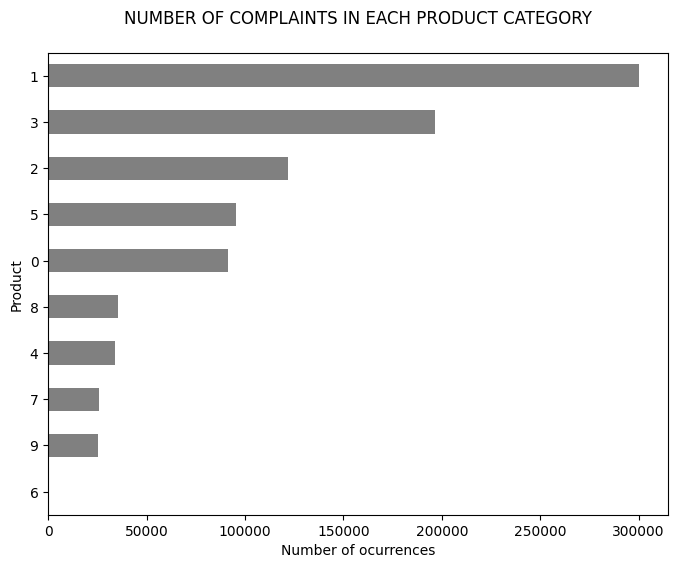

In [47]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

Since the classes are skewed so we use following parameter

Parameters in TfidfVectorizer
sublinear_tf=True
Purpose: Applies sublinear term frequency scaling. Instead of using the raw term frequency (tf), it uses 1 + log(tf). This can help to reduce the impact of frequently occurring terms and is useful when working with highly skewed term frequencies.

min_df=5
Purpose: Specifies the minimum number of documents a term must appear in to be included in the vocabulary.

Purpose: Defines the range of n-grams to include. (1, 2) means that both unigrams (single words) and bigrams (pairs of words) will be considered.
stop_words='English'
Purpose: Removes common English stop words from the text. Stop words are words that are frequently used but carry little meaningful information (e.g., the, is, in).

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train_res)

# Transform the testing data (do not fit again)



In [38]:
X_train_tfidf.shape

(926561, 41896)

In [39]:
X_test_tfidf = tfidf.transform(X_test_res)

In [40]:
X_test_tfidf.shape

(62727, 41896)

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = le.fit_transform(y_train_res)

# Transform the testing labels
y_test_encoded = le.transform(y_test_res)


In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                   precision    recall  f1-score   support

                            Bank Account Services       0.99      0.99      0.99      4306
Credit Reporting/Repair Services/Consumer Reports       0.99      0.99      0.99     32302
                             Credit/Prepaid Cards       0.98      0.98      0.98      6072
                                  Debt Collection       0.99      0.99      0.99      9887
                          Money Services/Transfer       0.98      0.98      0.98      1657
                                         Mortgage       0.99      0.99      0.99      4353
                          Other financial service       0.00      0.00      0.00         2
                                    Personal Loan       0.93      0.87      0.90      1244
                                     Student loan       0.99      0.99      0.99      1678
                            Vehicle loan or lease       0.89      0.92      0.91      122

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
import pickle

In [46]:
pickle_file = "/content/drive/My Drive/model.pkl"

# Save the model
with open(pickle_file, 'wb') as file:
    pickle.dump(model, file)

In [47]:
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)


In [62]:
# Parameter grids
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    },
    'LinearSVC': {
        'C': [0.1, 1, 10],
        'max_iter': [1000,1500]
    },
    'MultinomialNB': {
        'alpha': [0.1, 1, 5]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }
}


In [52]:

from sklearn.ensemble import RandomForestClassifier


In [55]:
from sklearn.metrics import accuracy_score, classification_report

In [56]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)



In [58]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.8140673075390182
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      0.48      0.63      4306
           1       0.75      1.00      0.86     32302
           2       0.98      0.62      0.76      6072
           3       0.93      0.85      0.89      9887
           4       1.00      0.01      0.02      1657
           5       0.97      0.83      0.89      4353
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00      1244
           8       1.00      0.58      0.73      1678
           9       0.00      0.00      0.00      1226

    accuracy                           0.81     62727
   macro avg       0.65      0.44      0.48     62727
weighted avg       0.81      0.81      0.78     62727



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
pickle_file = "/content/drive/My Drive/randomForestModel.pkl"

# Save the model
with open(pickle_file, 'wb') as file:
    pickle.dump(model, file)